**Лабораторная работа №8 “Выявление аномалий”**

Долматович Алина, 858641

Набор данных ex8data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - задержка в мс и пропускная способность в мб/c серверов. Среди серверов необходимо выделить те, характеристики которых аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий. В метках классов 0 обозначает отсутствие аномалии, а 1, соответственно, ее наличие.

Набор данных ex8data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 11-мерную переменную X - координаты точек, среди которых необходимо выделить аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий.


In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as pyplot
import numpy as np
from scipy.stats import norm
import math
import seaborn as sns

Загрузите данные ex8data1.mat из файла.

In [2]:
data = loadmat('ex8data1.mat')

x = data['X']

xVal = data['Xval']
yVal = data['yval']

print(x.shape, xVal.shape, yVal.shape)

((307, 2), (307, 2), (307, 1))


Постройте график загруженных данных в виде диаграммы рассеяния.

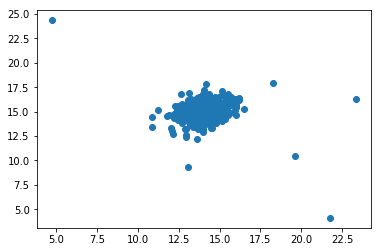

In [3]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.show()

Представьте данные в виде двух независимых нормально распределенных случайных величин.

In [4]:
def normalTransform(x):
    normal = []
    for i in range(x.shape[1]):
        mu, sigma = norm.fit(x[:, i])
        value = 1 / math.sqrt(2 * math.pi * sigma ** 2) * math.e ** (-((x[:, i]-mu) ** 2 / 2*sigma ** 2))
        normal.append(value)
    return np.array(normal).T

normalX = normalTransform(x)
print(normalX.shape)

(307, 2)


Оцените параметры распределений случайных величин.

In [5]:
def checkParameters(x):
    for i in range(x.shape[1]):
        mu, std = norm.fit(x[:, i])
        print(mu, std)
    
# checkParameters(x)
# checkParameters(normalX)

Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

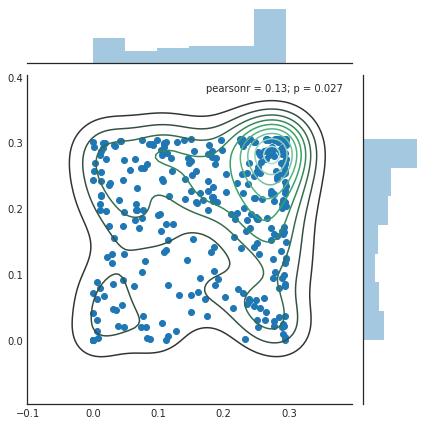

In [6]:
def densityPlot(x):
    with sns.axes_style('white'):
        sns.jointplot(x[:,0],x[:,1]).plot_joint(sns.kdeplot)

    pyplot.show()
    
densityPlot(normalX)

Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.


In [7]:
def f1Score(ypred, yact):
    tp, tn, fp, fn =0., 0., 0., 0.
    for yp,ya in zip(ypred, yact):
        if ya==1 and yp==1:
            tp+=1
        if ya==0 and yp==0:
            tn+=1
        if yp==0 and ya==1:
            fn+=1
        if yp==1 and ya==0:
            fp+=1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.


(307,)


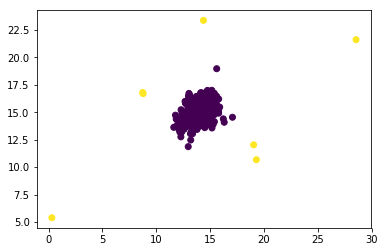

In [8]:
def zEvaluation(x, threshold=3.075):
    prediction = []
    rows, columns = x.shape
    
    for row in range(rows):
        for column in range(columns):
            mean = x[:, column].mean()
            std = x[:, column].std()
            if abs(x[row, column] - mean) / std > threshold:
                prediction.append(1)
                break
            if column == columns - 1:
                prediction.append(0)
    return np.array(prediction)

prediction = zEvaluation(xVal)
print(prediction.shape)
f1Score(prediction, yVal)

pyplot.scatter(xVal[:,0], xVal[:,1], c=prediction)
pyplot.show()

Загрузите данные ex8data2.mat из файла.


In [9]:
data2 = loadmat('ex8data2.mat')

x = data2['X']

xVal = data2['Xval']
yVal = data2['yval']

print(x.shape, xVal.shape, yVal.shape)

((1000, 11), (100, 11), (100, 1))


Представьте данные в виде 11-мерной нормально распределенной случайной величины.

In [10]:
normalX = normalTransform(x)
print(normalX.shape)

(1000, 11)


Оцените параметры распределения случайной величины.


In [11]:
# checkParameters(x)
# checkParameters(normalX)

Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.


In [12]:
threshold=3
prediction = zEvaluation(xVal, threshold)
f1Score(prediction, yVal)

0.625

Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?


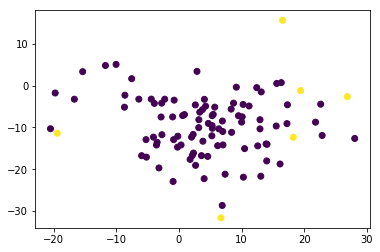

In [13]:
pyplot.scatter(xVal[:,0], xVal[:,1], c=prediction)
pyplot.show()

**Вывод**